# ML titanic prediction kaggle competion

<h2> Aim of the Notebook </h2>

This notebook is created for titanic kaggle competition. Notebook develop Random Forest Classifier for titanic survival chance

<h2> Data </h2>

Dataset provides information about passangers on titanic and did they survive or not. Splitted in test.csv and train.csv

- survival: is passanger a survival
    - 0 = No, 1 = Yes
- pclass: A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower
- age: Age in years
- sex: Sex of the passanger

- sibsp: # of siblings / spouses aboard the Titanic
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: # of parents / children aboard the Titanic 	
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
    - Some children travelled only with a nanny, therefore parch=0 for them.
- ticket: Ticket number
- fare: Passenger fare
- cabin: Cabin number
- embarked:Port of Embarkation 	
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
titanic_train = pd.read_csv("../../data/train.csv")
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_test = pd.read_csv("../../data/test.csv")
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print("Train data NA's")
titanic_train.isna().sum()

Train data NA's


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
print("Test data NA's")
titanic_test.isna().sum()

Test data NA's


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Data Preprocessing

In [6]:
#count number of words by spaces in names
name_words_count = titanic_train.Name.apply(lambda x: x.count(" "))
titanic_train["Name"] = name_words_count

name_words_count = titanic_test.Name.apply(lambda x: x.count(" "))
titanic_test["Name"] = name_words_count

#Encoding for sex (1 - male, 0 - female)
titanic_train["Sex"]= titanic_train.Sex.apply(lambda x: x == "male")
titanic_test["Sex"]= titanic_test.Sex.apply(lambda x: x == "male")

#drop tickets number and cabins from dataset
titanic_train = titanic_train.drop(["Ticket"], axis=1)
titanic_test = titanic_test.drop(["Ticket"], axis=1)

In [39]:
#Getting cabins deck
cabins_group = titanic_train[-titanic_train.Cabin.isna()].Cabin.astype(str).apply(lambda x: x[0])

#Copy the df and assign the cabins
titanic_with_cabins = titanic_train[-titanic_train.Cabin.isna()].copy()
titanic_with_cabins["Cabin"] = cabins_group

titanic_with_cabins = titanic_with_cabins.rename(columns={"Cabin":"Deck"})

titanic_with_cabins.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Deck,Embarked
1,2,1,1,6,False,38.0,1,0,71.2833,C,C
3,4,1,1,6,False,35.0,1,0,53.1000,C,S
6,7,0,1,3,True,54.0,0,0,51.8625,E,S
10,11,1,3,3,False,4.0,1,1,16.7000,G,S
11,12,1,1,2,False,58.0,0,0,26.5500,C,S


# EDA

# Distributions

Text(0.5, 1.0, 'Pclass (In full dataset) Distibution')

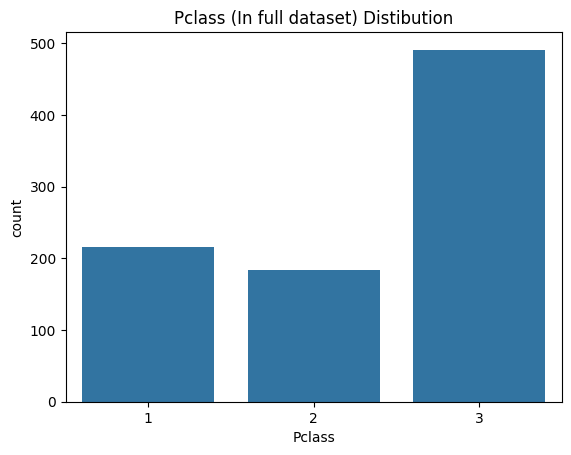

In [61]:
sns.countplot(titanic_train,x="Pclass")
plt.title("Pclass (In full dataset) Distibution")

Text(0.5, 1.0, 'Pclass in the distribution of decks (reduced dataset)')

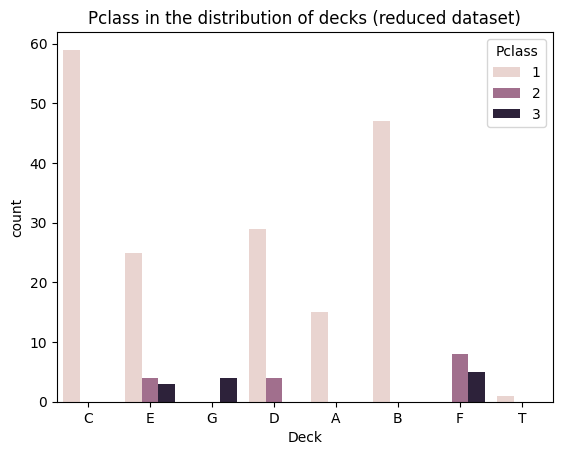

In [65]:
sns.countplot(titanic_with_cabins,x="Deck", hue="Pclass")
plt.title("Pclass in the distribution of decks (reduced dataset)")

Text(0.5, 1.0, 'Fare in the distribution of decks')

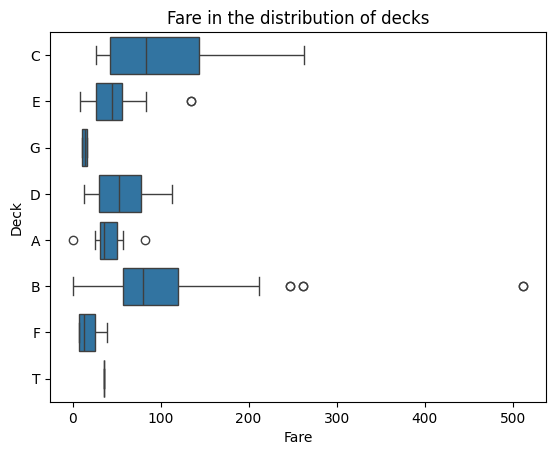

In [60]:
sns.boxplot(titanic_with_cabins, x="Fare", y = "Deck")
plt.title("Fare in the distribution of decks")

Text(0.5, 1.0, 'Deck survival distribution')

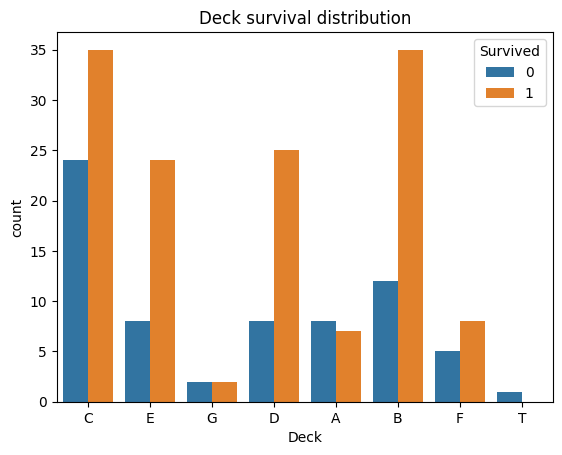

In [54]:
sns.countplot(titanic_with_cabins,x="Deck", hue="Survived")
plt.title("Deck survival distribution")